In [1]:
# Imports and settings

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Tasks

---

1. How many males and females are in this dataset?

2. What is the average age of females?

3. What is percentage of German citizens?

4. Make a bar plot of people education

5. What are the age average values and age standard deviation of those who earns > $50K per year and those who earns less than?

6. Is it true that people who earn >$50K has, at least, bachelors?

7. Find out a statistics of age for every nationality and gender. Use `groupby` and `describe`. Find max age of males from Amer-Indian-Eskimo nationality.

8. Who earns more, single or married? More is > 50K. Married are those whose marital-status beggins with Married.

9. What is the maximum number of working hours per week? How many people works that hours and what is the percentage who earns >$50K among them?

10. Find out average working hours per week for those who earns less than 50K and those who earns more by each native-country.

## Dataset Information:

---

https://archive.ics.uci.edu/ml/datasets/Adult

Listing of attributes: 

`>50K, <=50K`

**age**: continuous

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

**fnlwgt**: continuous

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

**education-num**: continuous

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

**sex**: Female, Male 

**capital-gain**: continuous

**capital-loss**: continuous

**hours-per-week**: continuous

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

### Understand the Data

---

In [3]:
# We have 32K entries with 15 attributes
data.shape

(32561, 15)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 1: How many males and females

In [7]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
males = data[data['sex'] == 'Male'].count()
females = data[data['sex'] == 'Female'].count()

In [9]:
mcount = males.mean()
mcount

21790.0

In [10]:
fcount = females.mean()
fcount

10771.0

In [11]:
mcount / fcount

2.0230247887846997

### 2: What is the average age of females?

In [12]:
females = data[data['sex'] == 'Female']

females['age'].mean()

36.858230433571627

### 3: What is percentage of German citizens?

In [13]:
data['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

### 4: Make a bar plot of people's education


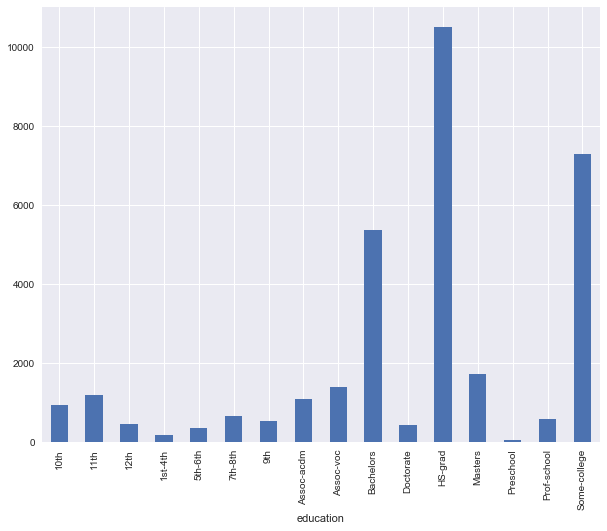

In [14]:
ed = data.sort_values(by='education', ascending=False)
ed = ed.groupby(by=['education'])['education']
ed.count().plot(kind='bar')

### 5: What are the age average values and age standard deviation of those who earns > $50K per year and those who earns less than?

In [55]:
earns_less = data[data['salary'] == '<=50K']
earns_more = data[data['salary'] != '<=50K']

In [16]:
# Mean
print(earns_less['age'].mean())
print(earns_more['age'].mean())

36.7837378641
44.2498405816


In [17]:
# Standard deviation
print(earns_less['age'].std())
print(earns_more['age'].std())

14.0200884908
10.5190277199


In [18]:
# Youngest well-earner
earns_more['age'].min()

19

In [19]:
# What percent of people earn more
1 - data['salary'].value_counts(normalize=True)['<=50K']

0.24080955744602439

### 6: Is it true that people who earn >$50K has, at least, bachelors?

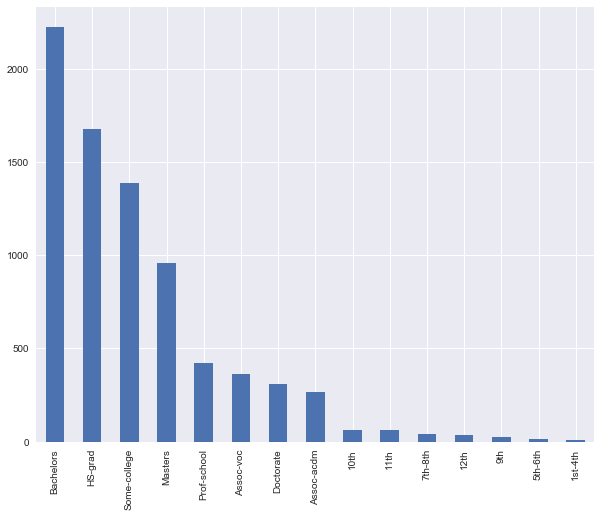

In [20]:
earns_more['education'].value_counts().plot('bar')

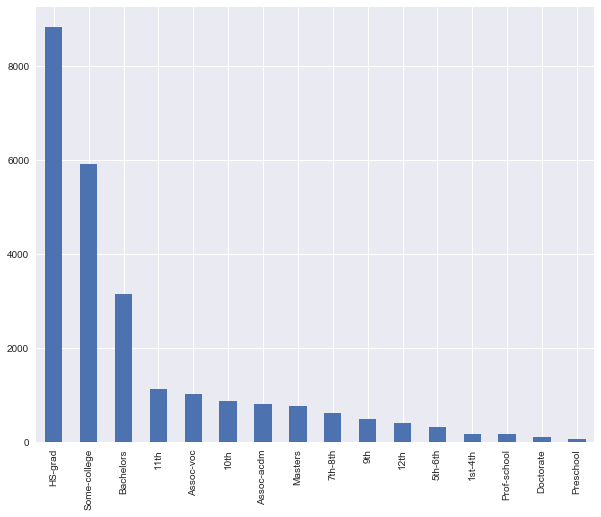

In [21]:
earns_less['education'].value_counts().plot('bar')

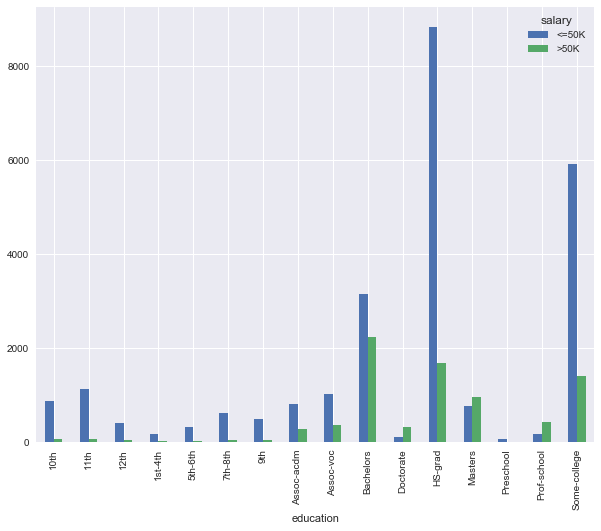

In [22]:
pd.crosstab(data['education'], data['salary']).plot(kind='bar')

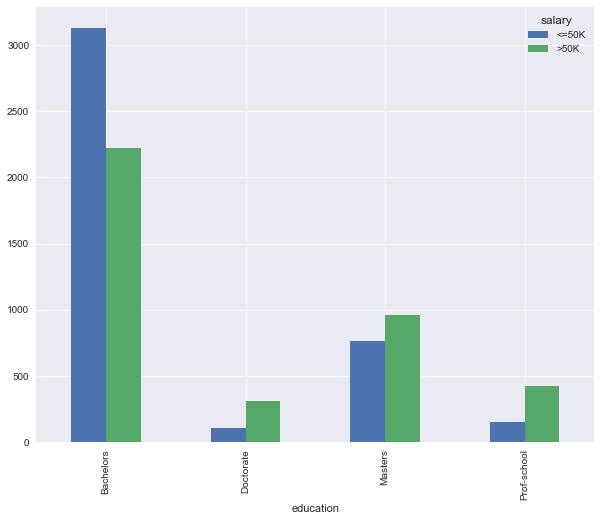

In [23]:
doctors = data[data['education'] == 'Doctorate']
trained = data[data['education'] == 'Prof-school']
masters = data[data['education'] == 'Masters']
bachelors = data[data['education'] == 'Bachelors']

docs_trained = pd.concat([doctors, trained, masters, bachelors])

pd.crosstab(docs_trained['education'], docs_trained['salary']).plot(kind='bar')

In [24]:
# Average age of degree holders
print(
'''
Bachelors:\t\t {0}
Masters:\t\t {1}
Doctorate:\t\t {2}
Prof-schools:\t\t {3}'''.format(
    bachelors['age'].mean(),
    masters['age'].mean(),
    doctors['age'].mean(),
    trained['age'].mean(),
))


Bachelors:		 38.90494864612511
Masters:		 44.04991294254208
Doctorate:		 47.70217917675545
Prof-schools:		 44.74652777777778


### 7: Find out a statistics of age for every nationality and gender. Use groupby and describe. Find max age of males from Amer-Indian-Eskimo nationality.

In [25]:
aie_group = data[data['race'] == 'Amer-Indian-Eskimo']
aie_age = aie_group['age']
aie_age.describe()

count    311.000000
mean      37.173633
std       12.447130
min       17.000000
25%       28.000000
50%       35.000000
75%       45.500000
max       82.000000
Name: age, dtype: float64

In [26]:
data.groupby(by='race').describe()

age  capital-gain  capital-loss  \
race                                                                 
Amer-Indian-Eskimo count    311.000000    311.000000    311.000000   
                   mean      37.173633    625.266881     34.176849   
                   std       12.447130   2753.238961    245.583106   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       35.000000      0.000000      0.000000   
                   75%       45.500000      0.000000      0.000000   
                   max       82.000000  27828.000000   1980.000000   
Asian-Pac-Islander count   1039.000000   1039.000000   1039.000000   
                   mean      37.746872   1478.358037     97.222329   
                   std       12.825133   9986.156906    423.556931   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       36.000000      0.000000      0.000000   
                   75%       45.000000      0.000000      0.000000   
                   max       90.000000  99999.000000   2457.000000   
Black              count   3124.000000   3124.000000   3124.000000   
                   mean      37.767926    609.940461     60.385083   
                   std       12.759290   5139.653447    337.394121   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       36.000000      0.000000      0.000000   
                   75%       46.000000      0.000000      0.000000   
                   max       90.000000  99999.000000   4356.000000   
Other              count    271.000000    271.000000    271.000000   
                   mean      33.457565    934.660517     61.070111   
                   std       11.538865   8625.128995    322.452705   
                   min       17.000000      0.000000      0.000000   
                   25%       25.000000      0.000000      0.000000   
                   50%       31.000000      0.000000      0.000000   
                   75%       41.000000      0.000000      0.000000   
                   max       77.000000  99999.000000   2179.000000   
White              count  27816.000000  27816.000000  27816.000000   
                   mean      38.769881   1121.660375     90.806155   
                   std       13.782306   7504.533302    410.833347   
                   min       17.000000      0.000000      0.000000   
                   25%       28.000000      0.000000      0.000000   
                   50%       37.000000      0.000000      0.000000   
                   75%       48.000000      0.000000      0.000000   
                   max       90.000000  99999.000000   4356.000000   

                          education-num        fnlwgt  hours-per-week  
race                                                                   
Amer-Indian-Eskimo count     311.000000  3.110000e+02      311.000000  
                   mean        9.311897  1.208311e+05       40.048232  
                   std         2.310387  8.833864e+04       11.695364  
                   min         2.000000  1.228500e+04        3.000000  
                   25%         9.000000  3.503650e+04       40.000000  
                   50%         9.000000  1.025410e+05       40.000000  
                   75%        10.000000  1.761420e+05       40.000000  
                   max        16.000000  4.451680e+05       84.000000  
Asian-Pac-Islander count    1039.000000  1.039000e+03     1039.000000  
                   mean       10.960539  1.599406e+05       40.127045  
                   std         2.811582  8.512231e+04       12.556816  
                   min         1.000000  1.487800e+04        1.000000  
                   25%         9.000000  9.332100e+04       40.000000  
              

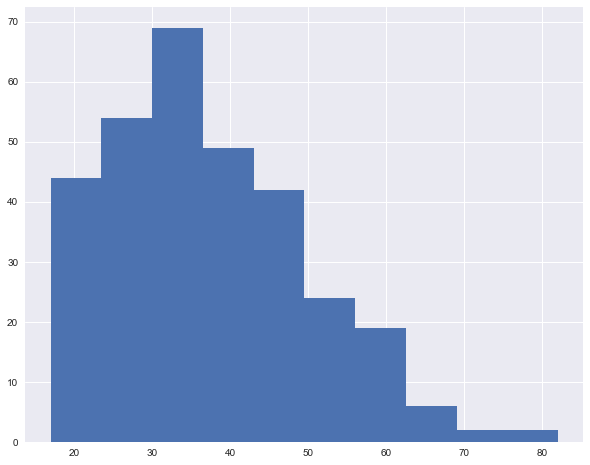

In [27]:
aie_age.hist()

#### Extra: how working hours correlate to salary

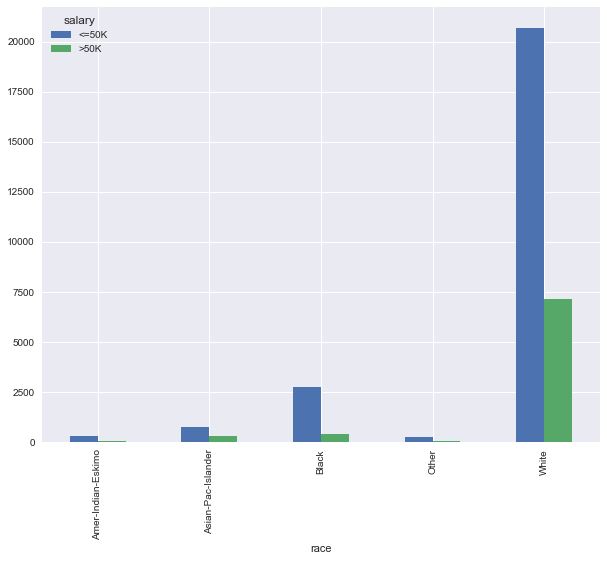

In [110]:
# Salaries by race
pd.crosstab(data['race'], data['salary']).plot(kind='bar')

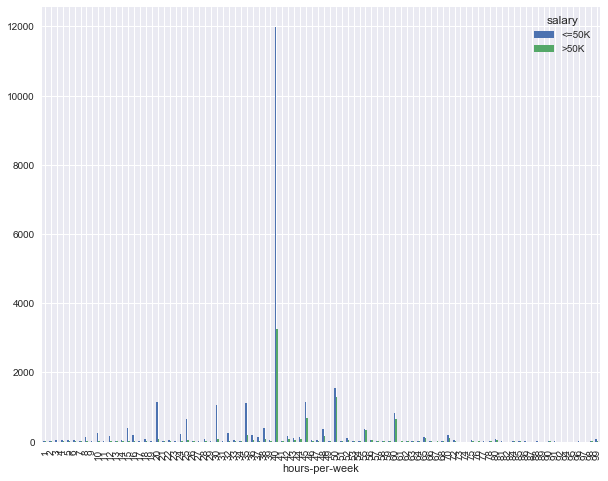

In [112]:
pd.crosstab(data['hours-per-week'], data['salary']).plot(kind='bar')

To read this data we should reduce hours per week X axis to some ranges:

* 00..20
* 20..40
* 40..60
* 60..80
* 80..99

In [30]:
# Ranging function
def in_range(n: int) -> str:
    if n > 80:
        return '80..99'
    elif n > 60:
        return '60..80'
    elif n > 40:
        return '40..60'
    elif n > 20:
        return '20..40'
    elif n <= 20:
        return '00..20'

data['working-week-length'] = data.apply(lambda x: in_range(x['hours-per-week']), axis=1)

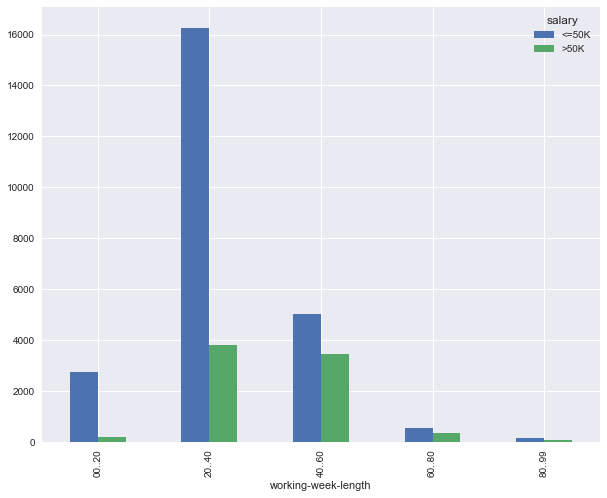

In [31]:
pd.crosstab(data['working-week-length'], data['salary']).plot(kind='bar')

### 8: Who earns more, single or married? More is > 50K. Married are those whose marital-status beggins with Married.

In [32]:
# Find married people
married = data[(data['marital-status'].str.startswith('Married'))]
married['salary'].value_counts()

<=50K    8681
>50K     6736
Name: salary, dtype: int64

In [33]:
# Find single ones
single = data[data['marital-status'].isin(['Divorced', 'Never-married', 'Separated', 'Widowed'])]
single['salary'].value_counts()

<=50K    16039
>50K      1105
Name: salary, dtype: int64

In [34]:
def is_single(status: str) -> bool:
    if status == 'Divorced' or status == 'Never-married' or status == 'Separated' or status == 'Widowed':
        return True
    else:
        return False

data['single'] = data.apply(lambda x: is_single(x['marital-status']), axis=1)

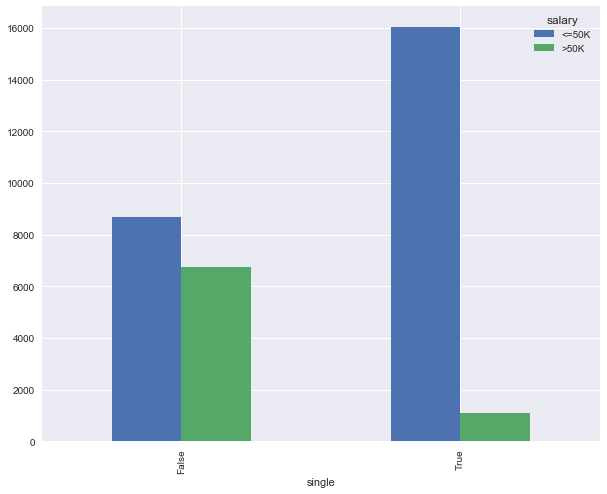

In [35]:
pd.crosstab(data['single'], data['salary']).plot(kind='bar')

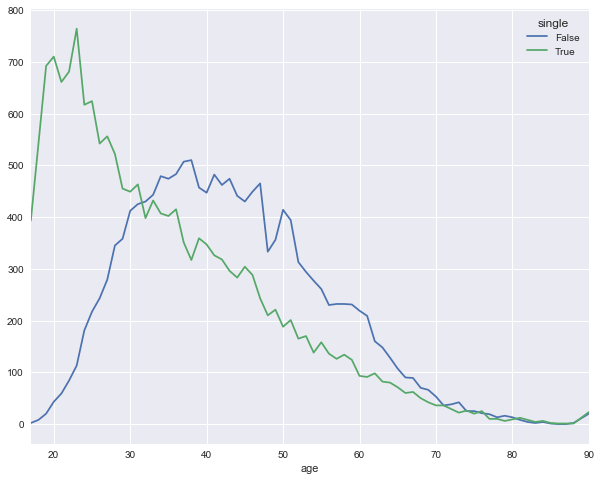

In [114]:
pd.crosstab(data['age'], data['single']).plot(kind='line')

### 9: What is the maximum number of working hours per week? How many people works that hours and what is the percentage who earns >$50K among them?

In [41]:
sorted = data.sort_values(by='hours-per-week', ascending=False)
sorted.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working-week-length,single
8654,30,Private,103596,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,99,United-States,<=50K,80..99,True
15460,37,Private,241174,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,80..99,False
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K,80..99,False
26250,36,Self-emp-not-inc,257250,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K,80..99,False
16992,19,Private,121074,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K,80..99,False


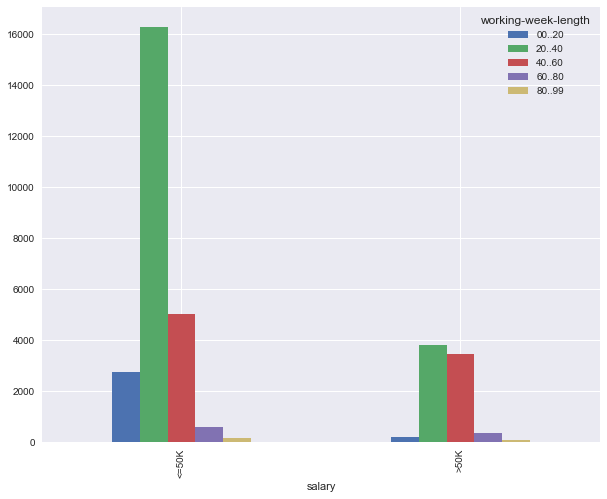

In [42]:
pd.crosstab(sorted['salary'], sorted['working-week-length']).plot(kind='bar')

In [52]:
sorted[sorted['hours-per-week'] == 99]['age'].describe()

count    85.000000
mean     43.517647
std      13.339533
min      19.000000
25%      34.000000
50%      42.000000
75%      51.000000
max      90.000000
Name: age, dtype: float64

### 10: Find out average working hours per week for those who earns less than 50K and those who earns more by each native-country.

In [65]:
l = earns_less['hours-per-week'].mean()
m = earns_more['hours-per-week'].mean()

print('< 50K: {} hours\n' \
      '> 50K: {} hours'.format(l, m))

< 50K: 38.840210355987054 hours
> 50K: 45.473026399693914 hours


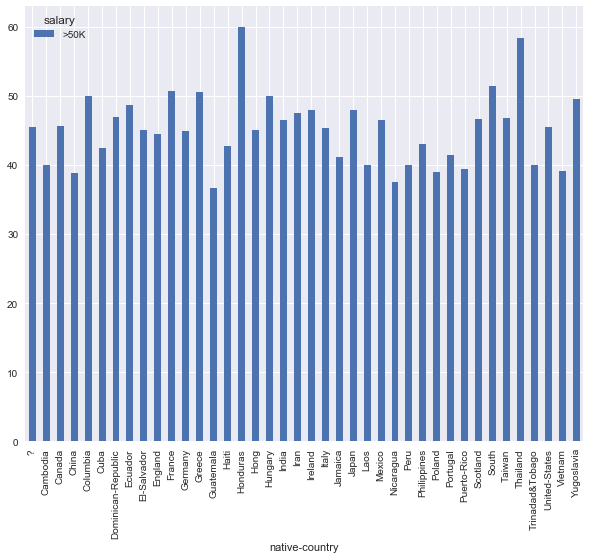

In [106]:
pd.crosstab(earns_more['native-country'], earns_more['salary'], values=earns_more['hours-per-week'], aggfunc=np.mean).plot(kind='bar')

In [107]:
el = earns_less['native-country'].value_counts()
el

United-States                 21999
Mexico                          610
?                               437
Philippines                     137
Puerto-Rico                     102
El-Salvador                      97
Germany                          93
Canada                           82
Jamaica                          71
Cuba                             70
Dominican-Republic               68
South                            64
Vietnam                          62
Guatemala                        61
England                          60
India                            60
Columbia                         57
China                            55
Italy                            48
Poland                           48
Haiti                            40
Japan                            38
Portugal                         33
Nicaragua                        32
Taiwan                           31
Peru                             29
Iran                             25
Ecuador                     

In [108]:
em = earns_more['native-country'].value_counts()

In [91]:
em.mean()

196.02500000000001

In [90]:
el.mean()

588.57142857142856

In [93]:
em['Japan']

24

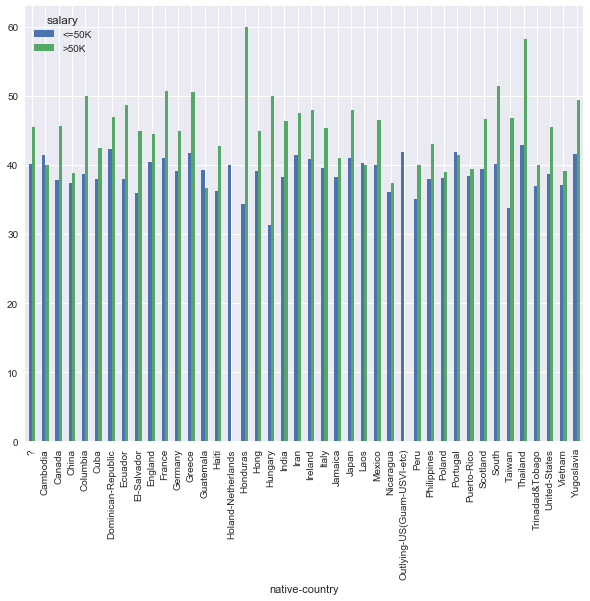

In [105]:
pd.crosstab(data['native-country'], data['salary'], values=data['hours-per-week'], aggfunc=np.mean).plot(kind='bar')